In [1]:
import xgboost
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import *
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
import lightgbm as lgb
from lightgbm import plot_importance
import warnings
warnings.filterwarnings('ignore')

In [3]:
def pre_setting():
    last_train_data_add = pd.read_csv("last_train_data_add.csv")
    last_test_data_add = pd.read_csv("last_test_data_add.csv")
    
    X = last_train_data_add
    y = last_test_data_add
    
    model_lgb = lgb.LGBMClassifier(nthread=3, reg_alpha=1.0)
    model_qda = QuadraticDiscriminantAnalysis(store_covariance=True)
    model_lda = LinearDiscriminantAnalysis(n_components=3, solver="svd", store_covariance=True)
    model_xg = XGBClassifier(nthread=3)
    
    return X, y, model_lgb, model_qda, model_lda, model_xg

X, y, model_lgb, model_qda, model_lda, model_xg = pre_setting()

In [4]:
def submit_kaggle(df_train, df_test, model, path, user_id = "id", target = "country_destination"):
    
    le = LabelEncoder()

    y_train = le.fit_transform(df_train[target])
    X_train = df_train.drop([target, user_id], axis = 1)
    
    X_test_id = df_test[user_id]
    X_test = df_test.drop([user_id, target], axis = 1)
    

    print("model fitting 시작")
    model = model.fit(X_train, y_train)
    predic_proba = model.predict_proba(X_test)
    print("model fitting 종료")

    df_submit = pd.DataFrame(columns=["id", "country"])
    ids = []
    cts = []
    for i in range(len(X_test_id)):
        idx = X_test_id.iloc[i]
        ids += [idx] * 5
        cts += le.inverse_transform(np.argsort(predic_proba[i])[::-1])[:5].tolist()
    df_submit["id"] = ids
    df_submit["country"] = cts
    df_submit.to_csv(path, index = False)
    print("csv file 생성")
    !kaggle competitions submit -c airbnb-recruiting-new-user-bookings -f {path} -m "Message"

In [5]:
submit_kaggle(X, y, model_lgb, './submission/submit_xg.csv', "id", "country_destination")

model fitting 시작
model fitting 종료
csv file 생성
Successfully submitted to Airbnb New User Bookings

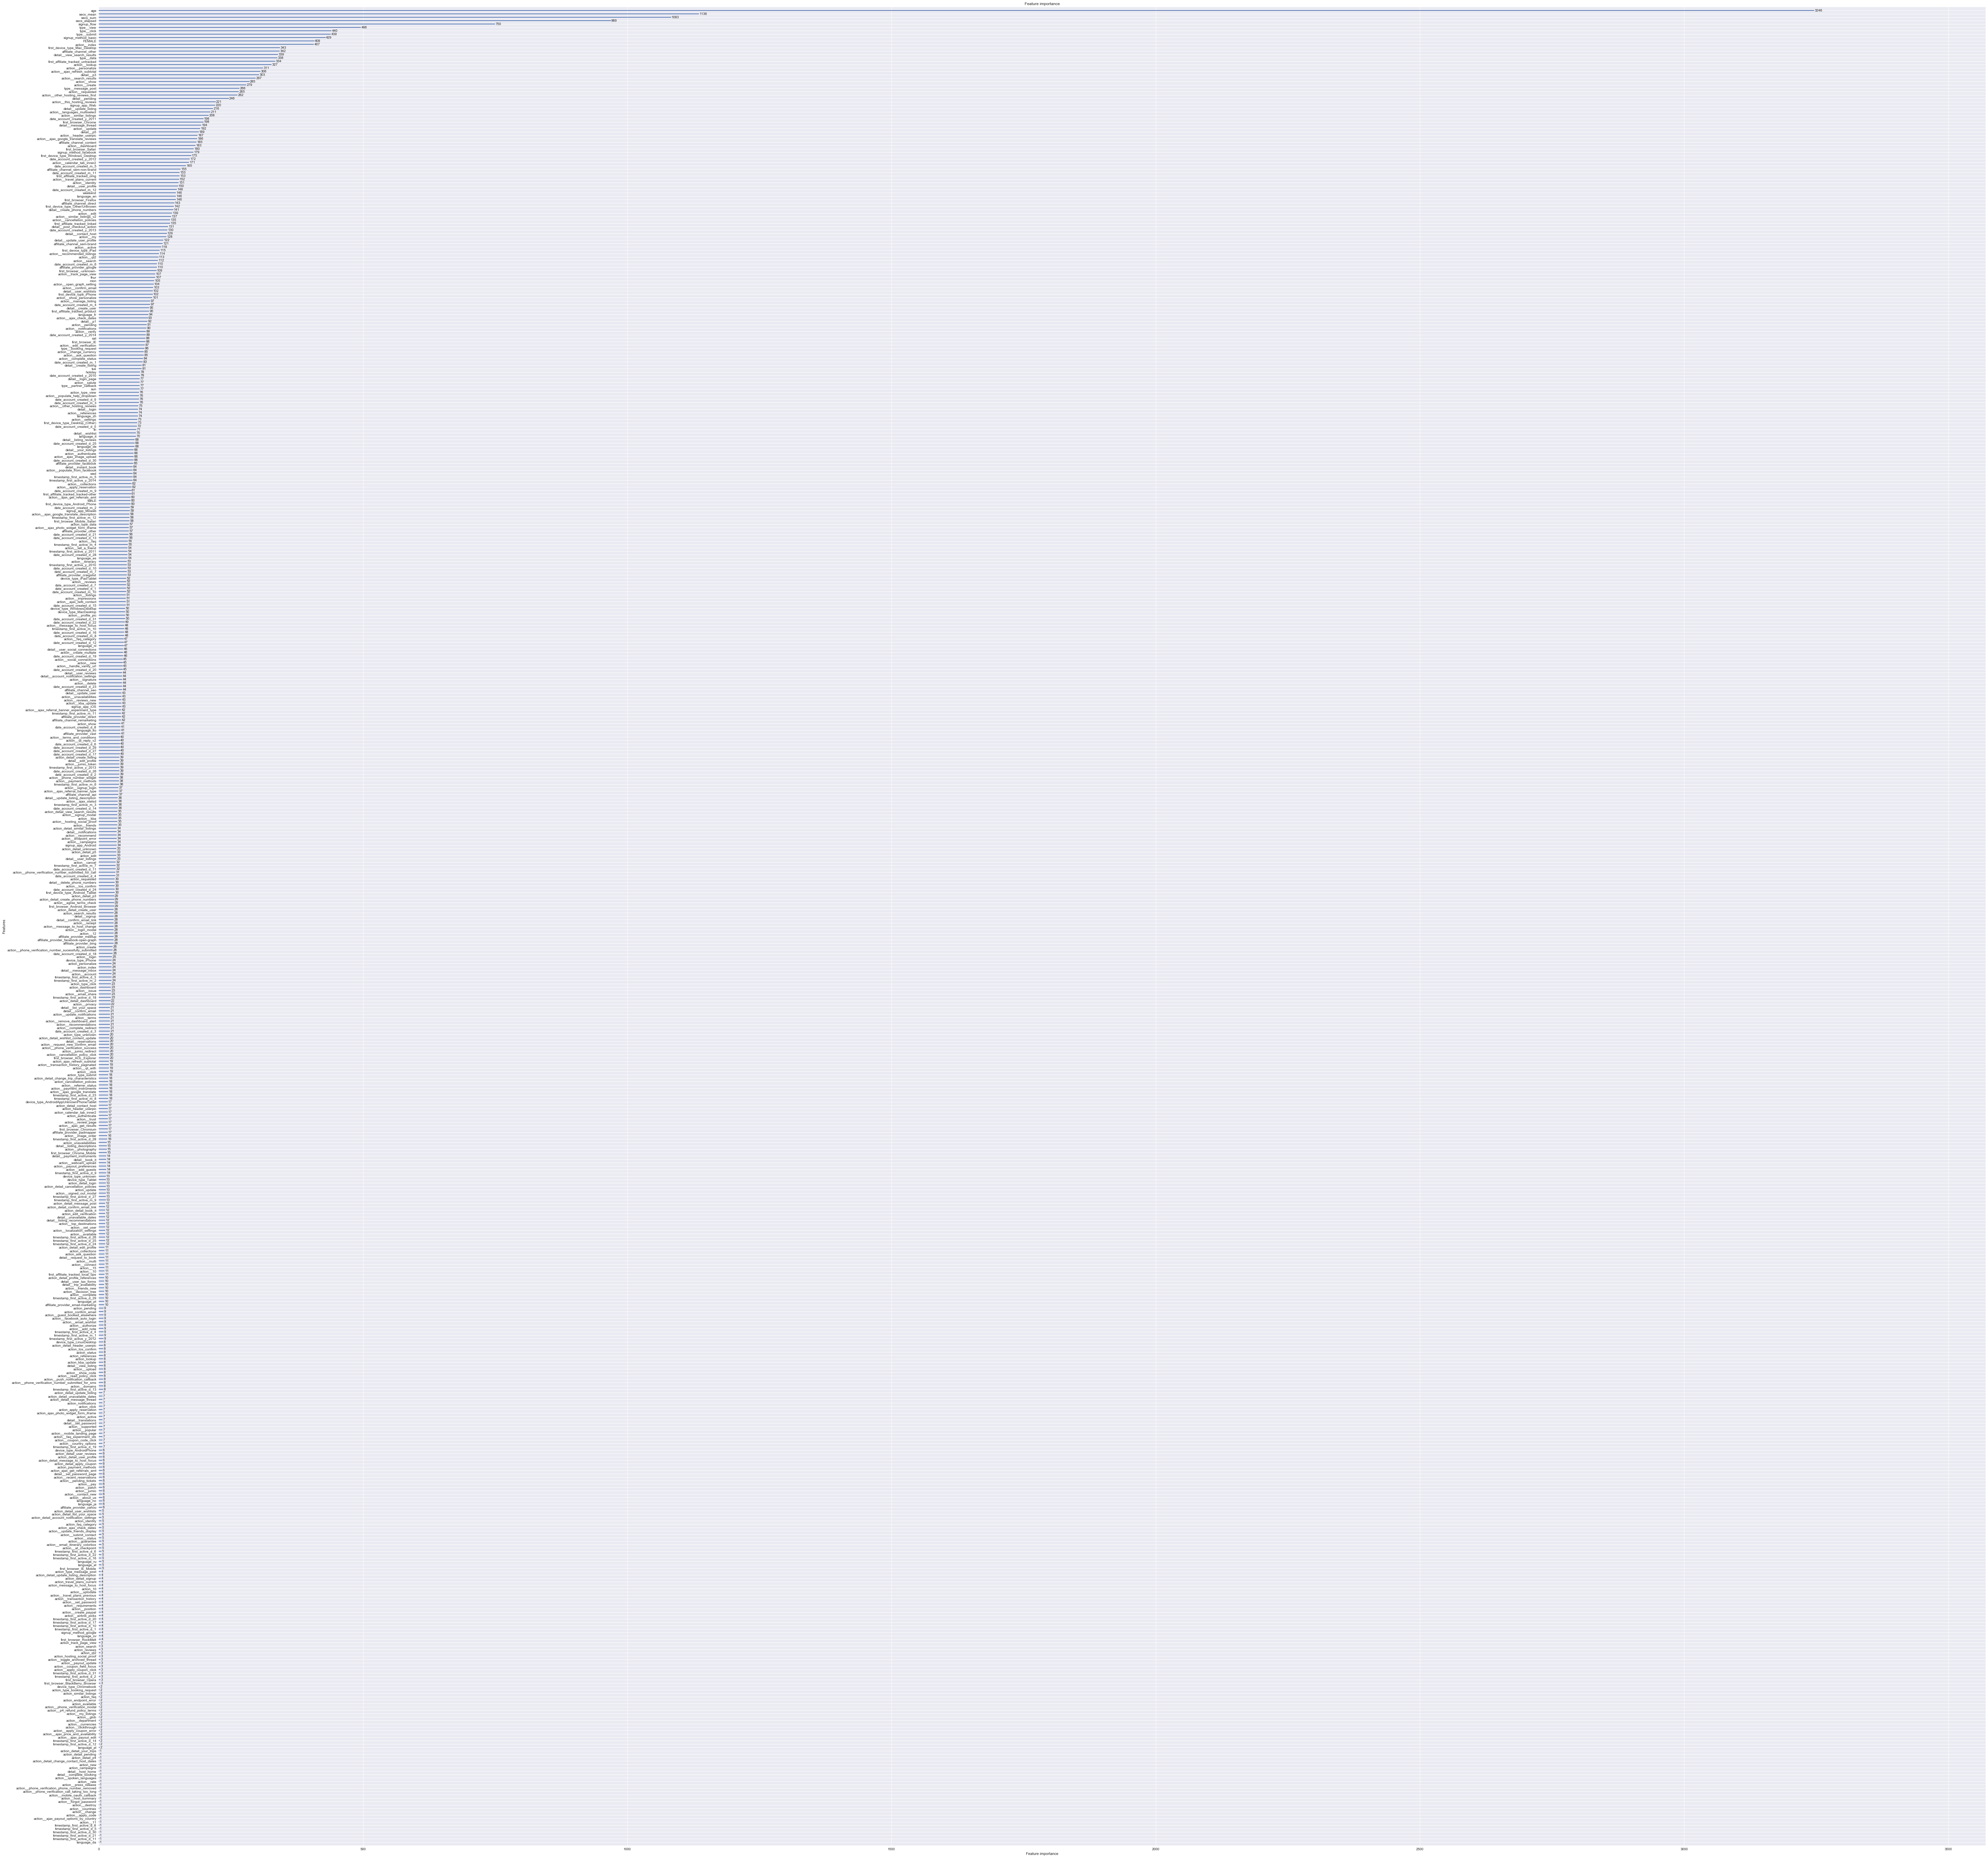

In [61]:
plot_importance(model_lgb, figsize=(100, 100))

In [91]:
def model_importance_feature():

    importances = model_lgb.feature_importances_
    importances = pd.DataFrame(importances, columns=["importance"])
    
    i_c = X.drop(["id", 'country_destination'],axis=1)
    i_c = i_c.columns
    i_c = pd.DataFrame(i_c, columns=["name"])
    f_i = pd.concat([i_c,importances],axis=1)
    
    f_i_test75 = f_i[f_i['importance'] < 10]
    
    f_i_test75_l = list(f_i_test75["name"])
    
    X_test_75 = X.drop(f_i_test75_l,axis=1)
    y_test_75 = y.drop(f_i_test75_l, axis=1)
    
    return X_test_75, y_test_75

X_test_75, y_test_75 = model_importance_feature()

In [97]:
model_lgb_i = lgb.LGBMClassifier(nthread=3, n_estimators=)
model_qda_i = QuadraticDiscriminantAnalysis(store_covariance=True)
model_lda_i = LinearDiscriminantAnalysis(n_components=3, solver="svd", store_covariance=True)
model_xg_i = XGBClassifier(nthread=3)

In [98]:
submit_kaggle(X_test_75, y_test_75, model_lgb_i, './submission/submit_xg.csv', "id", "country_destination")

model fitting 시작
model fitting 종료
csv file 생성
Successfully submitted to Airbnb New User Bookings

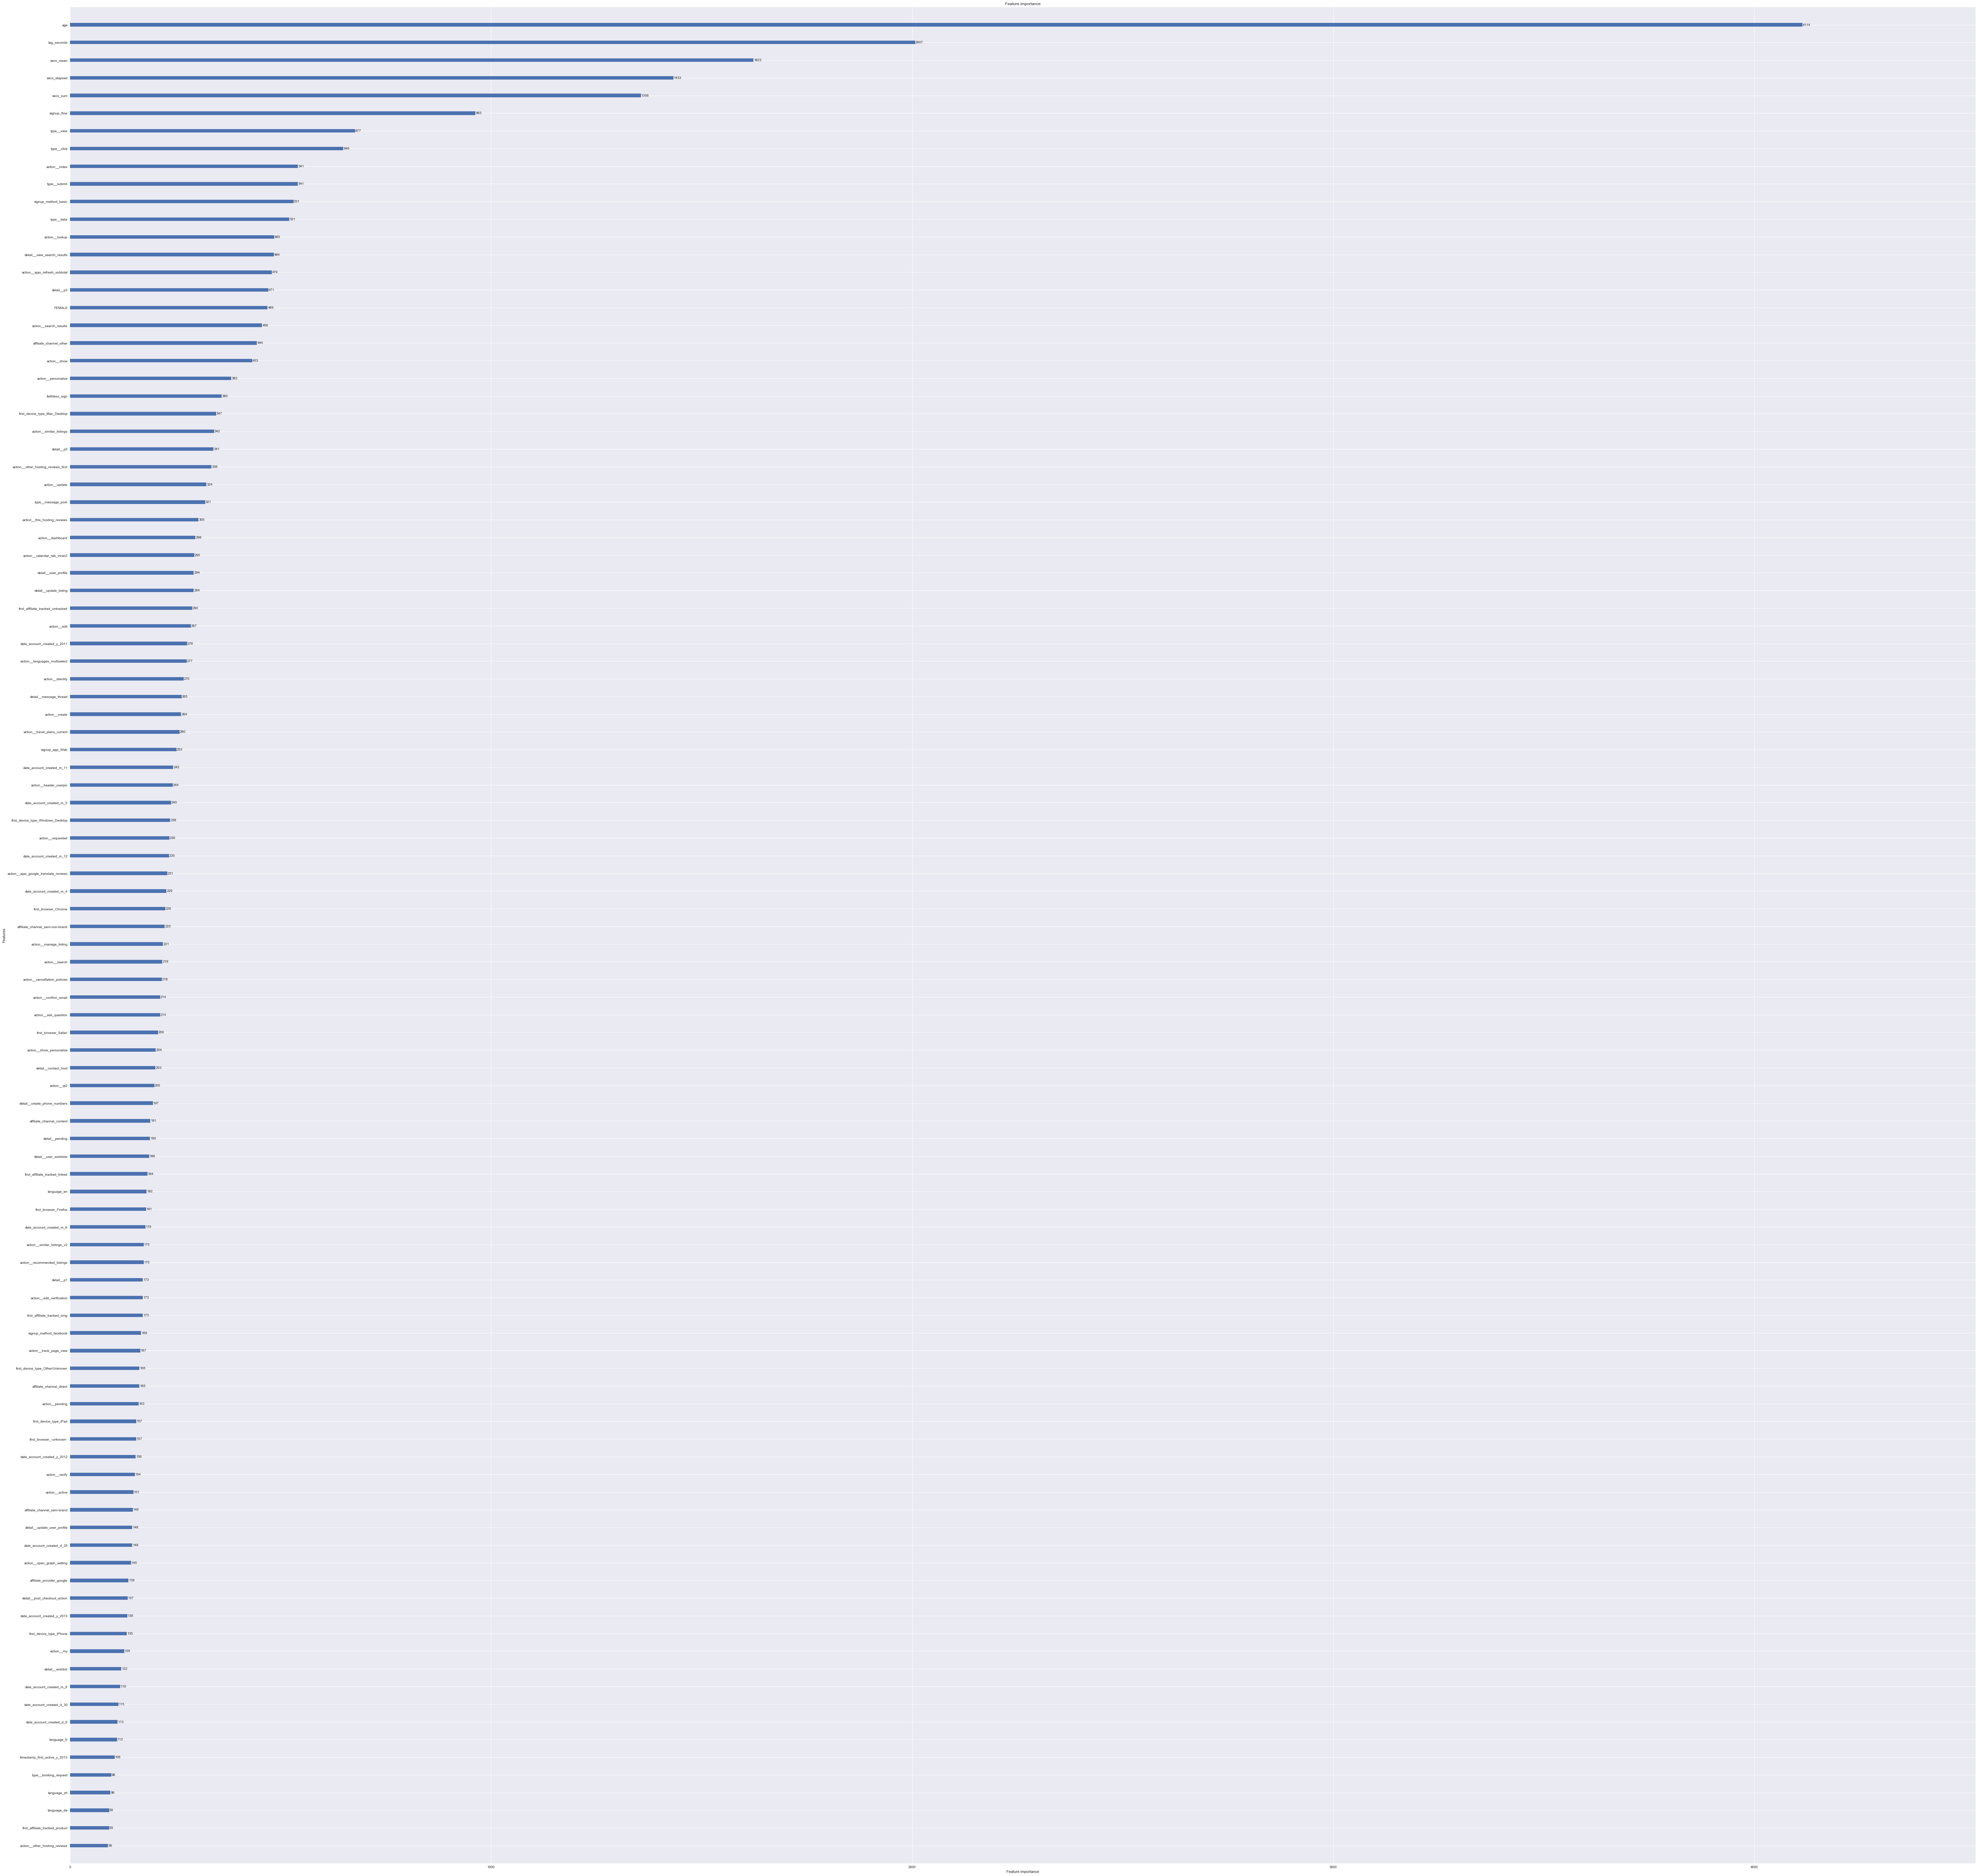

In [174]:
plot_importance(model_lgb_i, figsize=(100, 100))

---

In [ ]:
pro_t = model_des_forest.predict_proba(last_test_data.drop(["id", "country_destination"], axis=1))

ids = []  #list of ids
cts = []  #list of countries
for i in range(len(sample_submission_NDF)):
    idx = sample_submission_NDF.iloc[i, 0]
    ids += [idx] * 5
    cts += le.inverse_transform(np.argsort(pro_t[i])[::-1])[:5].tolist()

df_sample1 = pd.DataFrame(columns=['id', 'country'])
df_sample1['id'] = ids
df_sample1['country'] = cts
df_sample1 = df_sample1.reset_index(drop=True)
df_sample1.to_csv('./submission/submission.csv', sep=',', na_rep='NaN', index = False)